<h1>Exploring Binomial Distribution</h1>

This notebook is based on the tutorial "Binomial distributions | Probabilities of probabilities, part 1" by 3blue1brown https://www.youtube.com/watch?v=8idr1WZ1A7Q

I created this notebook to practice and play with the basic concept of binomial distribution by implementing the theoritical concept explained in the video. In this video the author takes an example of reviews from the customer and develops a model to find the optimal success rate. 

To generate the review data, we generate random number between 0 to 1. Any number less than 0.95 is a positive review and viceversa.



In [1]:
### To include packages folder path
import sys, os
sys.path.insert(0, os.path.abspath('') + "/../")

In [2]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from packages import binomial_distribution
import numpy as np
import math
import functools

In [3]:
number_of_observations = 10000
reviews_per_observation = 50
positive_reviews = 48
ob_interval = 1000
headers = ["No. of Observations", "Total Reviews", "Positive Reviews", "Percentage"]
metrics_rows = []
observations = []
for observation in range(100, number_of_observations, ob_interval):
    events = binomial_distribution.generate_events(observation, reviews_per_observation) 
    metrics = binomial_distribution.get_metrics(events, reviews_per_observation, positive_reviews)
    metrics_rows.append(metrics)
    observations.append(events)
    
binomial_distribution.display_table((headers, metrics_rows))


No. of Observations          Total Reviews          Positive Reviews          Percentage          
100                          50                     48                        25.00%              
1100                         50                     48                        26.91%              
2100                         50                     48                        26.29%              
3100                         50                     48                        26.39%              
4100                         50                     48                        26.07%              
5100                         50                     48                        26.14%              
6100                         50                     48                        26.36%              
7100                         50                     48                        25.44%              
8100                         50                     48                        26.69%              
9100      

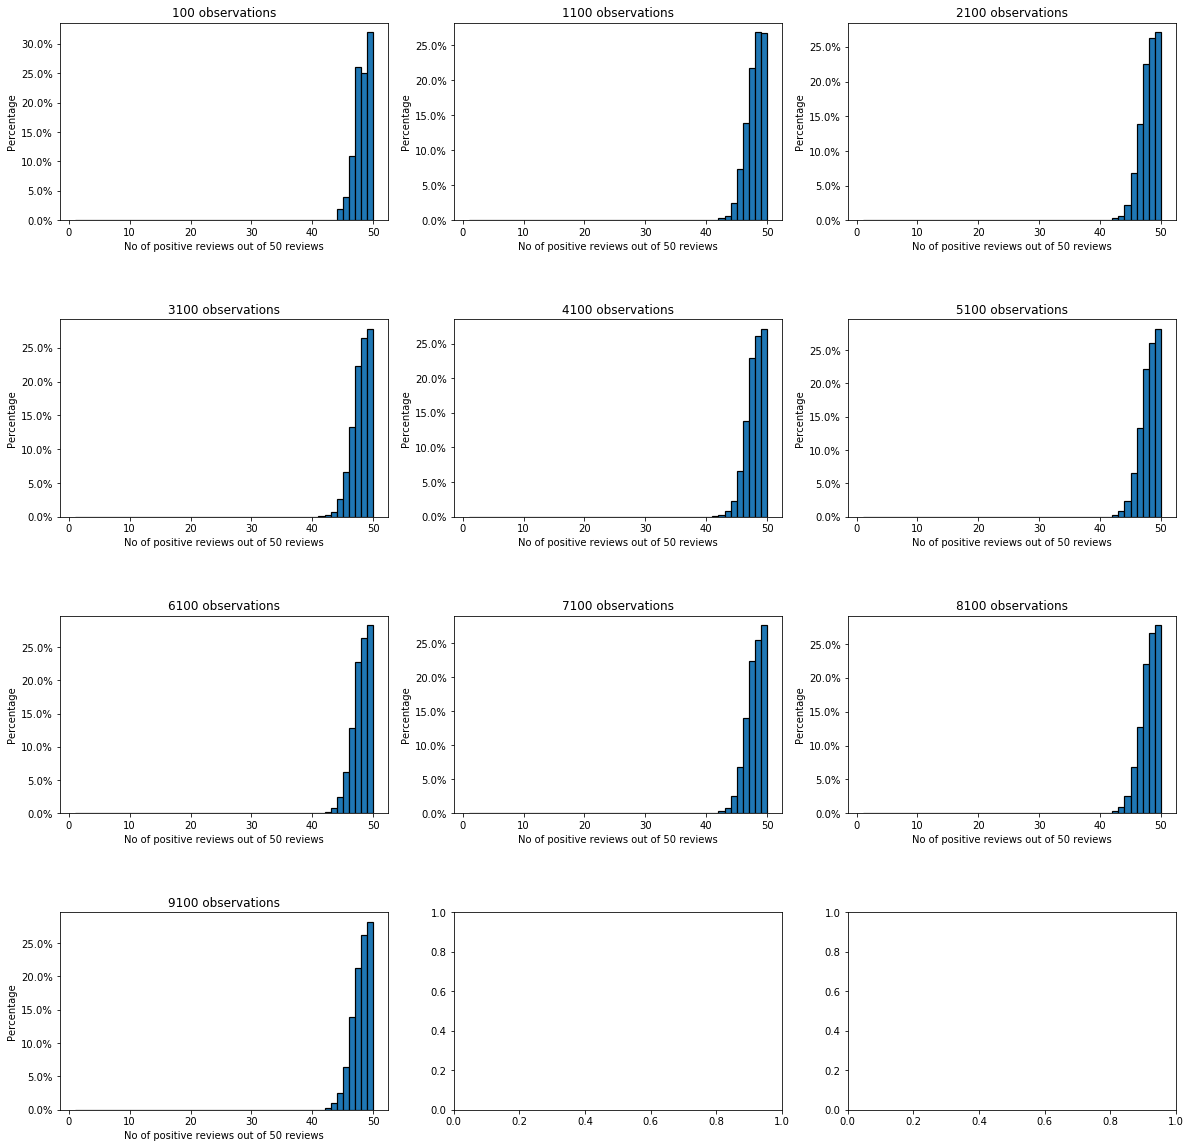

In [4]:
binomial_distribution.plot_hist(observations, reviews_per_observation)    